# Anomaly detection. Чому це окрема проблема?

12 грудня 2023 року була одна з найбільших DDoS в історії Monobank. 52 млн запитів в секунду, при нормальних 52 тис. Що може стати з системою якщо не витримати атаку? Найлегше це відключення системи і тимчасова остановка бізнеса, найгірше це втрата даних та конфідеційності, пошкодження заліза та пошкодження рептуації. Тобто в 2024 році гарно спланована атака може повністю покласти всю компанію і всі її здобутки. Щоб такого не було треба робити систему оборони. Один з пунктів якої це адлгоритми детекції підозрилих (аномальних) дій.

*В монобанк 8 млн клієнтів. Офіційно в Україні до 2022 року було приблизно 40 млн населення.


![alt text](https://fakty.ua/user_uploads_new/images/articles/2023/12/12/430357/%D0%BE%D0%BB%D0%B5%D0%B3.jpg)

## Застосування

Виявлення аномалій використовується у таких областях як:

1. **Передбачення поломок обладнання**

Так, у 2010 році Іранські центрифуги були атаковані вірусом Stuxnet, який поставив неоптимальний режим роботи обладнання та вивів з ладу частину обладнання за рахунок прискореного зносу.

Якби на устаткуванні використовувалися алгоритми пошуку аномалій, ситуації виходу з експлуатації можна було уникнути. Пошук аномалій у роботі устаткування використовується у атомної промисловості, а й у металургії, і роботі авіаційних турбін. І в інших областях, де використання передиктивної діагностики дешевше за можливі втрати при непрогнозованій поломці.

2. **Передбачення шахрайських дій**

Якщо з карти, якою ви користуєтеся у Подільську, знімають гроші в Албанії, можливо, транзакції слід додатково перевірити.

3. **Виявлення аномальних споживчих патернів**

Якщо частина клієнтів демонструє аномальну поведінку, можливо, є проблема, яку ви не знаєте.

4. **Виявлення аномального попиту та навантаження**

Якщо продажі в магазині FMCG (товари повсякденного попиту) знизилися нижче за межі довірчого інтервалу прогнозу, варто знайти причину того, що відбувається.

А також:
- Виявлення підозрілих банківських операцій (Credit-card Fraud)
- Виявлення вторгнень (Intrusion Detection)
- Виявлення нестандартних гравців на біржі (інсайдерів)
- Виявлення неполадок у механізмах за показаннями датчиків
- Медична діагностика (Medical Diagnosis)
- Сейсмологія

# Математичне формулювання

Математично задачу пошуку аномалій можна сформулювати наступним чином:

Припустимо, що маємо набір даних $X = (x_1, x_2, ..., x_n)$, де $x_i$ представляє собою $d$-вимірний вектор ознак, $i = 1,2,...,n$. Наша мета полягає в тому, щоб ідентифікувати аномалії, тобто точки даних, які відрізняються від більшості набору даних.

Один з загальних підходів до цієї задачі - це моделювання "нормальної" області даних і визначення аномалій як точок, які відхиляються від цієї моделі.Математично, це може бути сформульовано як задача мінімізації аномальної функції втрат $L$, яка може бути обрана відповідно до обраних методів.

Таким чином, задачу пошуку аномалій можна сформулювати як знайти множину
$$S ⊂ X$$
де $S$ - це множина точок, що є аномаліями, так, щоб вона мінімізувала функцію втрат $L$ при врахуванні обмежень, визначених конкретним методом пошуку аномалій.

![alt text](https://habrastorage.org/webt/gb/rn/c2/gbrnc2rxmeczjeqy8y3eqkjngko.png)

### Що таке "нормально"?

[Normal Distribution Demonstration (Bean Machine script for Physion)](https://www.youtube.com/watch?v=PM7z_03o_kk&ab_channel=AlxG0r)

Нормальний розподіл, також відомий як гауссівський розподіл, є одним з найбільш важливих та широко використовуваних розподілів у статистиці та ймовірнісному аналізі. Він часто використовується для моделювання випадкових величин у багатьох областях, оскільки відображається в багатьох природних процесах. Нормальний розподіл має симетричну форму, яка нагадує дзвоник. Це означає, що більшість значень знаходиться навколо середнього значення, а значення, що знаходяться далеко від середнього, зустрічаються рідше.

Нормальний розподіл характеризується двома параметрами:

- середнім аріфмітичним значенням (μ)
- стандартним відхиленням (σ)

Його функція щільності ймовірностей (probability density function, PDF) визначається наступним чином:
$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$$

де $f(x)$ - ймовірність того, що випадкова величина набуде значення $x$.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/1200px-Standard_deviation_diagram_micro.svg.png)

За домопогою функції щільності ймовірності нормального розподілу ми можемо розрахувати ймовірність набуття конкретного значення характеристики для кожного прикладу. Якщо ми припустимо, що ознаки екземплярів є незалежними (зазвичай так і є), то загальна ймовірність існування такого зразку є добутком ймовірностей по кожній окремій характеристиці:

$$ p(\mathbf{x}) = \prod_{i=1}^{n} p(x_i; \mu_i, \sigma_i^2)$$

Отже, розрахувавши середнє значення $μ$ та стандартне відхилення $σ$ для кожної з характеристик наших прикладів ми можемо визначити чи даний приклад є нормальним, чи аномальним.
$$p(\mathbf{x}^{(j)}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_i} e^{-\frac{(x_i^{(j)} - \mu_i)^2}{2\sigma_i^2}} < \epsilon$$


![alt text](https://i.stack.imgur.com/QF7ob.png)

## Наступне питання, це визначення **"порогу нормальності" $ϵ$**.



Для того, щоб визначити порогове значення $ϵ$ ми повинні натренувати нашу модель.Давайте розглянемо приклад вибору порогу нормальності $ϵ$ на основі алгоритму $Elliptic Envelope$ для виявлення аномалій у наборі даних.

Припустимо, у нас є набір даних з двох ознак (наприклад, витрати на рекламу та продажі товарів) і ми хочемо виявити аномальні точки, які можуть вказувати на аномальні витрати або несправності в системі.

1. **Експертна оцінка**: За експертною оцінкою витрати, що вище ніж, скажімо, 3 стандартних відхилень від середнього, можуть бути вже вважатися аномальними. Таким чином, ми можемо встановити $ϵ=3$.

2. **Кількісний підхід**: Ми можемо використати тренувальний набір даних без аномалій для оцінки ефективності різних значень $ϵ$. Наприклад, ми можемо перевірити, які аномалії будуть виявлені при різних значеннях $ϵ$ і обрати те значення, яке дає найкращий баланс між чутливістю та специфічністю.

3. **Застосування квантилей**: Ми можемо вибрати $ϵ$ як квантиль, що відповідає, скажімо, 95-й або 99-й частці витрат на рекламу та продажі.

4. **Крива ROC**: Ми можемо використати криву ROC для оцінки різних значень $ϵ$ та обрати те, яке максимізує площу під кривою.

5. **Холд-аут або перехресна перевірка**: Розділивши дані на тренувальний та тестовий набори, ми можемо використати тестовий набір для оцінки ефективності різних значень $ϵ$.

Це лише декілька підходів до вибору порогу нормальності. Вибір конкретного підходу залежить від характеристик набору даних, вимог до виявлення аномалій та контексту задачі.

## ЗАУВАЖЕННЯ!!!

**Виявлення аномалій та задача класифікації є двома різними завданнями** в області машинного навчання. Ось деякі ключові різниці між ними:

- **Цільова задача**: У задачі класифікації ми намагаємося призначити кожному зразку або екземпляру конкретний клас або категорію, заздалегідь відомий. У виявленні аномалій ми шукаємо нестандартні, відхиляються від очікуваних шаблонів або зразків, які можуть не мати заздалегідь визначеного класу.

- **Характер даних**: В задачі класифікації ми зазвичай маємо набір даних, в якому кожен зразок має властивості або ознаки, які допомагають відрізнити різні класи. У виявленні аномалій ми шукаємо відхилення від нормального або очікуваного розподілу даних, іноді без явно визначених властивостей або ознак.

- **Тип навчання**: В задачі класифікації можемо використовувати навчання з учителем, де маємо позначені дані з відомими мітками класу. У виявленні аномалій можемо використовувати як навчання з учителем, коли є позначені дані аномалій, так і навчання без учителя, коли ми просто намагаємося виявити незвичайні або відхилені екземпляри.

- **Вибірка даних**: У задачі класифікації намагаємося побудувати модель, яка може класифікувати нові невідомі зразки на підставі знань, набутих з навчальної вибірки. У виявленні аномалій, зазвичай, маємо значно меншу кількість аномалій в порівнянні з нормальними даними, тому це може бути проблемою для моделей.

- **Оцінка результатів**: В задачі класифікації ми можемо використовувати різні метрики, такі як точність, чутливість, специфічність та F-міра, для оцінки ефективності моделі. У виявленні аномалій, окрім тих самих метрик, можуть використовуватися також ROC-крива та площа під ним (AUC-ROC), а також інші метрики, що враховують специфічні вимоги виявлення аномалій.

Ці дві задачі мають свої особливості та вимоги, і виявлення аномалій є складнішою задачею, оскільки вона вимагає виявлення відхилень, які можуть бути менш очевидними або навіть відсутніми у навчальних даних.

# Методи виявлення аномалій



Вибір найбільш впливового методу для виявлення аномалій залежить від конкретного контексту задачі, особливостей даних та потреб користувача. Однак, деякі методи можуть бути особливо ефективними у певних сценаріях. Ось одні з найпопулярніших методів:

1. Elliptic envelope та статистичні методи
2. Метричні методи (Local Outlier Factor (LOF))
3. Метод ізолюючого лісу – isolate forest
4. Метод опорних векторів з одним класом One-Class SVM
5. Метод основних компонент
6. Кластерні методи
7. Навчання з учителем (регресія, класифікація)
8. Алгоритми з урахуванням прогнозування часових рядів
9. Модельні тести

## Elliptic envelope та статистичні методи

**Elliptic Envelope** - це метод для виявлення аномалій в наборі даних, який базується на гаусівському розподілі даних. Його основна ідея полягає в тому, щоб упакувати (еліпсоїдально) найбільш "концентровані" області даних, вважаючи їх за "нормальні", тоді як ті області, які виходять за цей еліпсоїд, можуть бути визнані як аномалії.

Основні кроки роботи методу:

- Оцінка гаусівського розподілу: Спочатку метод оцінює параметри гаусівського розподілу для даних, такі як середнє значення і коваріаційна матриця.

- Обчислення відстані до центру: Для кожної точки даних обчислюється відстань до центру гаусівського розподілу, використовуючи метрику Махаланобіса.

- Визначення порогу: Метод використовує аномальний рівень (контамінацію), який задається користувачем або може бути автоматично обчислений, для визначення порогу, за яким точки вважаються аномаліями.

- Виявлення аномалій: Точки, які перевищують встановлений поріг, вважаються аномальними.

**Метод може бути особливо ефективним** у випадках, коли дані мають гаусівський розподіл та коли аномалії відрізняються від нормальних даних за розподілом або дисперсією.

Важливо зазначити, що цей метод підходить для виявлення аномалій у випадках, коли аномалії мають відмінності у розподілі від нормальних даних, але він може бути **менш ефективним** у випадках, коли аномалії змішані з нормальними даними або коли їх розподіл суттєво відрізняється від гаусівського.

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*OFnYenTBDV7CpFpku2ziPg.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Генеруємо випадкові дані для прикладу
np.random.seed(42)
X_normal = np.random.normal(loc=0, scale=1, size=(1000, 2))
y_normal = np.zeros(len(X_normal))
X_anomalies = np.random.normal(loc=5, scale=1, size=(10, 2))
y_anom = np.ones(len(X_anomalies))

X = np.vstack([X_normal, X_anomalies])
y = np.hstack([y_normal, y_anom])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

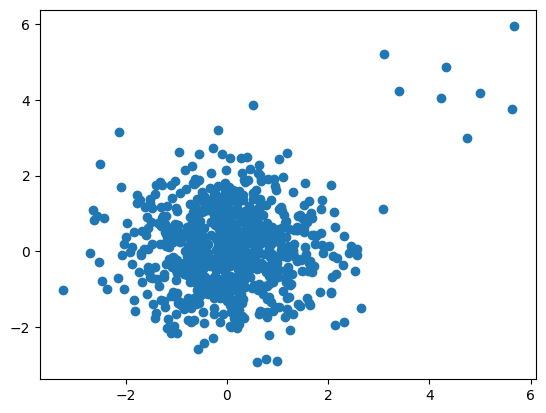

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', linestyle='-')

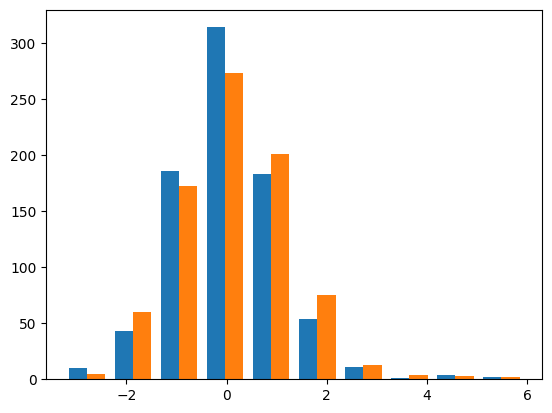

In [4]:
plt.hist(X_train, bins= 10)
plt.show()

For epsilon = 0.0001, detected anomalies: 0.0%
For epsilon = 0.0001, f1 score: 0.0

For epsilon = 0.001, detected anomalies: 50.0%
For epsilon = 0.001, f1 score: 0.6666666666666666

For epsilon = 0.01, detected anomalies: 100.0%
For epsilon = 0.01, f1 score: 1.0

For epsilon = 0.1, detected anomalies: 1000.0%
For epsilon = 0.1, f1 score: 0.18181818181818182

For epsilon = 0.2, detected anomalies: 2250.0%
For epsilon = 0.2, f1 score: 0.0851063829787234



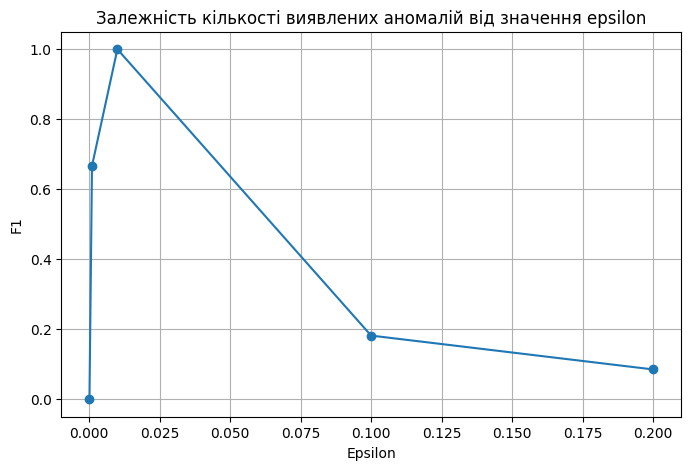

In [5]:
epsilon_values = [0.0001, 0.001, 0.01, 0.1, 0.2]
detected_anomalies_count = []
f1_scores = []

for epsilon in epsilon_values:
    model = EllipticEnvelope(contamination=epsilon, random_state=42)
    model.fit(X_train)
    anomalies_predicted = model.predict(X_test) == -1
    det_anom_count = np.sum(anomalies_predicted)
    detected_anomalies_count.append(det_anom_count)
    f1 = f1_score(anomalies_predicted, y_test)
    f1_scores.append(f1)
    print(f"For epsilon = {epsilon}, detected anomalies: {det_anom_count/(y_test == 1).sum()*100}%")
    print(f"For epsilon = {epsilon}, f1 score: {f1}")
    print()


plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, f1_scores, marker='o', linestyle='-')
plt.title('Залежність кількості виявлених аномалій від значення epsilon')
plt.xlabel('Epsilon')
plt.ylabel('F1')
plt.grid(True)
plt.show()

In [6]:
# Знаходження найкращого значення epsilon за F1-показником
best_epsilon = epsilon_values[np.argmax(f1_scores)]
print("Найкраще значення epsilon за F1-показником:", best_epsilon)

Найкраще значення epsilon за F1-показником: 0.01


In [14]:
# Використання методу LOF для виявлення аномалій
model = EllipticEnvelope(contamination=0.01, random_state=42)
model.fit(X_train)
anomalies_predicted = model.predict(X_test)

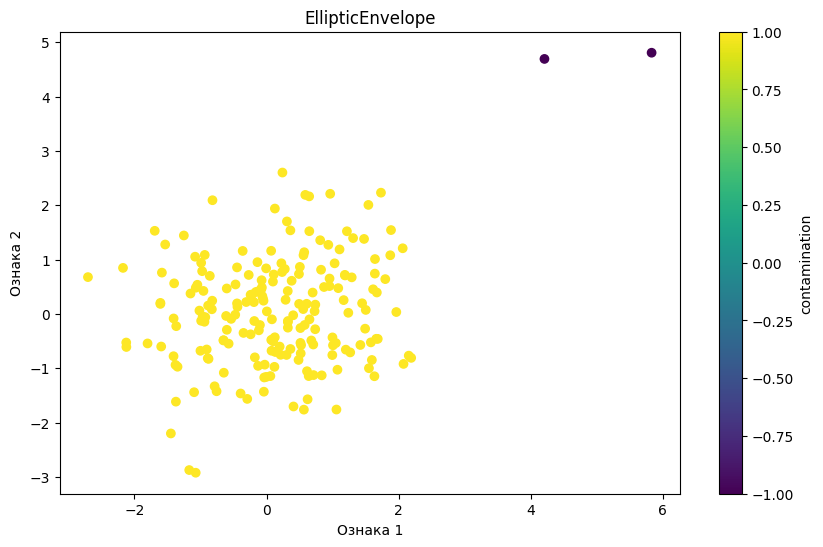

In [15]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))

plt.scatter(X_test[:, 0], X_test[:, 1], c=anomalies_predicted, cmap='viridis')
plt.title('EllipticEnvelope')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.colorbar(label='contamination')
plt.show()

## Метричні методи (Local Outlier Factor (LOF))


**Метод локальних аномалій (LOF)** є одним з популярних методів виявлення аномалій, який базується на метричних методах. Основна ідея полягає в тому, щоб оцінити, наскільки "нестандартною" є кожна точка даних порівняно зі своїм оточенням, використовуючи відношення її відстаней до сусідів.

Основні кроки роботи методу LOF:

- **Оцінка локальної густини**: Для кожної точки даних обчислюється локальна густина, яка вимірюється як відношення середньої відстані до k найближчих сусідів до відстані до k-го найближчого сусіда.

- **Оцінка локальної аномалійності**: LOF визначає аномальність кожної точки шляхом порівняння її локальної густини з локальною густинею її сусідів. Точка вважається аномальною, якщо її локальна густина виявляється значно меншою, ніж локальні густини її сусідів.

- **Визначення порогу**: Точки, які мають LOF значення більше заданого порогу, вважаються аномальними.

- **Виявлення аномалій**: Точки, які перевищують встановлений поріг, вважаються аномальними.

LOF може ефективно виявляти аномалії, які знаходяться у різних густинних регіонах або мають відмінність у своїх сусідських структурах. Однак, важливо пам'ятати, що цей метод може бути вимогливим до обчислень, оскільки він вимагає обчислення відстаней між всіма парами точок у наборі даних.

LOF є одним із методів виявлення аномалій, який дозволяє виявляти аномалії без прив'язки до певного розподілу даних і може бути ефективним у випадках, коли аномалії мають складну структуру або коли вони змішані з нормальними даними.

![alt text](https://www.researchgate.net/publication/355858197/figure/fig2/AS:1085744433106960@1635873053535/The-illustration-of-Local-Outlier-Factor-LOF-process-A-Determine-the-number-of-k-value.png)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Генеруємо випадкові дані для прикладу
np.random.seed(42)
X_normal = np.random.normal(loc=0, scale=1, size=(1000, 2))
y_normal = np.zeros(len(X_normal))
X_anomalies = np.random.normal(loc=5, scale=1, size=(10, 2))
y_anom = np.ones(len(X_anomalies))

X = np.vstack([X_normal, X_anomalies])
y = np.hstack([y_normal, y_anom])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

For neighbors = 2, detected anomalies: 1350.0%
For neighbors = 2, f1 score: 0.0

For neighbors = 5, detected anomalies: 1800.0%
For neighbors = 5, f1 score: 0.0

For neighbors = 10, detected anomalies: 1200.0%
For neighbors = 10, f1 score: 0.15384615384615385

For neighbors = 50, detected anomalies: 1050.0%
For neighbors = 50, f1 score: 0.17391304347826084

For neighbors = 80, detected anomalies: 1000.0%
For neighbors = 80, f1 score: 0.18181818181818182

For neighbors = 100, detected anomalies: 1050.0%
For neighbors = 100, f1 score: 0.17391304347826084

For neighbors = 200, detected anomalies: 950.0%
For neighbors = 200, f1 score: 0.1904761904761905

For neighbors = 500, detected anomalies: 1150.0%
For neighbors = 500, f1 score: 0.16



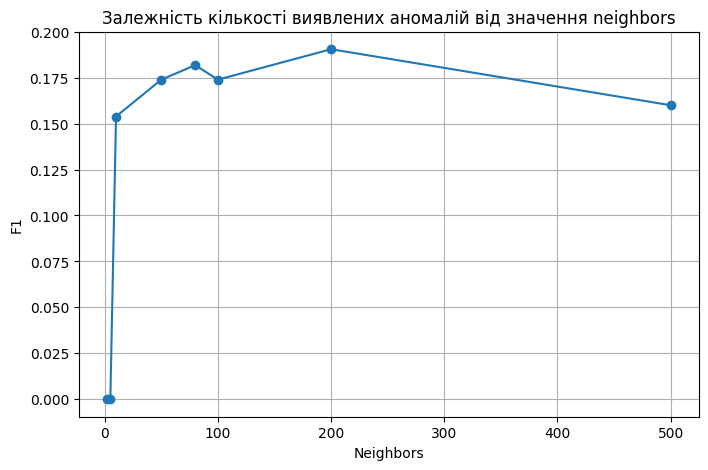

In [8]:
neighbors = [2, 5, 10, 50, 80, 100, 200, 500]
detected_anomalies_count = []
f1_scores = []

for neighbor in neighbors:
    model = LocalOutlierFactor(n_neighbors=neighbor, contamination=0.1, novelty = True)
    model.fit(X_train)
    anomalies_predicted = model.predict(X_test) == -1
    det_anom_count = np.sum(anomalies_predicted)
    detected_anomalies_count.append(det_anom_count)
    f1 = f1_score(anomalies_predicted, y_test)
    f1_scores.append(f1)
    print(f"For neighbors = {neighbor}, detected anomalies: {det_anom_count/(y_test == 1).sum()*100}%")
    print(f"For neighbors = {neighbor}, f1 score: {f1}")
    print()


plt.figure(figsize=(8, 5))
plt.plot(neighbors, f1_scores, marker='o', linestyle='-')
plt.title('Залежність кількості виявлених аномалій від значення neighbors')
plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.grid(True)
plt.show()

In [9]:
# Знаходження найкращого значення epsilon за F1-показником
best_n = neighbors[np.argmax(f1_scores)]
print("Найкраще значення neighbors за F1-показником:", best_n)

Найкраще значення neighbors за F1-показником: 200


In [11]:
# Використання методу LOF для виявлення аномалій
lof = LocalOutlierFactor(n_neighbors=best_n, contamination=0.1)
y_pred = lof.fit_predict(X_test)

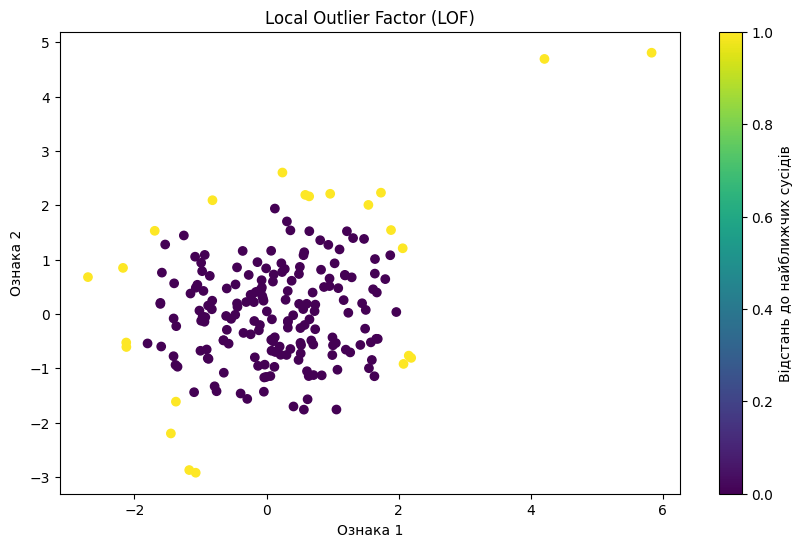

In [12]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))

plt.scatter(X_test[:, 0], X_test[:, 1], c=anomalies_predicted, cmap='viridis')
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.colorbar(label='Відстань до найближчих сусідів')
plt.show()

## Метод ізолюючого лісу – isolate forest

Метод **ізолюючого лісу (Isolation Forest)** є ще одним ефективним методом виявлення аномалій, який відрізняється від інших методів, таких як LOF або Elliptic Envelope. Він базується на ідеї того, що аномалії є більш "відокремленими" від нормальних даних і можуть бути швидше виявлені за допомогою дерева рішень.

Основні принципи методу ізолюючого лісу:

- **Відокремленість аномалій**: Основна ідея полягає в тому, що аномалії зазвичай потрапляють у вузькі області дерева рішень (ізоляції) швидше, ніж нормальні дані. Це дозволяє відокремлювати аномалії від нормальних даних.

- **Випадкове розбиття**: Для побудови моделі ізолюючого лісу випадково обирається ознака і випадково обирається значення для цієї ознаки для розбиття даних на дві групи в кожному вузлі дерева.

- **Глибина дерева**: Дерева рішень побудовані в ізоляції, тобто без обучення в групах (класифікації), і вони зазвичай невеликої глибини.

- **Метод оцінки аномалій**: Відстань від точки до кореня дерева рішень (середнє значення довжини шляхів від точки до кореня по всіх деревах) використовується для оцінки аномальності точок. Чим менше ця відстань, тим більше вірогідність, що точка є аномалією.

- **Визначення порогу**: На підставі оцінки аномальності кожної точки можна визначити поріг, за яким точки вважаються аномаліями.

- **Виявлення аномалій**: Точки, які перевищують встановлений поріг, вважаються аномальними.

Метод ізолюючого лісу є швидким і ефективним для великих наборів даних та даних в високих вимірах. Він не вимагає складного підбору параметрів та має гарну здатність до виявлення аномалій в наборах даних з великою кількістю аномалій або змішаними типами аномалій.

https://towardsdatascience.com/how-to-perform-anomaly-detection-with-the-isolation-forest-algorithm-e8c8372520bc

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*6GFMewU1Aax57nsW2uSakQ.png)

## Метод опорних векторів з одним класом One-Class SVM

**Метод опорних векторів з одним класом (One-Class SVM)** є алгоритмом машинного навчання, який використовується для виявлення аномалій в наборі даних. Основна ідея полягає в тому, щоб відокремити нормальні дані від всіх інших точок, включаючи аномалії.

Основні принципи One-Class SVM:

- **Визначення одного класу**: В One-Class SVM навчальний набір даних містить лише нормальні дані. Алгоритм намагається побудувати границю, яка відокремлює нормальні дані від всіх інших точок в просторі.

- **Функція потерь**: One-Class SVM мінімізує розмір границі, що оточує нормальні дані. Це робиться за допомогою функції потерь, яка вимагає, щоб границя була як найбільш близько до нормальних даних, так і якомога далі від інших точок.

- **Опорні вектори**: Під час навчання моделі One-Class SVM знаходяться опорні вектори - це найбільші відстані від границі до найближчих точок нормальних даних. Ці опорні вектори визначають форму та розмір границі.

- **Визначення порогу**: Після навчання моделі встановлюється поріг, який визначає, які точки вважатимуться аномаліями. Якщо відстань від точки до границі перевищує цей поріг, то точка вважається аномалією.

- **Виявлення аномалій**: Після визначення порогу One-Class SVM може використовуватися для виявлення аномалій в нових даних. Якщо точка відстане від границі більше за встановлений поріг, то вона вважатиметься аномалією.

One-Class SVM корисний там, де доступні лише дані одного класу, наприклад, у випадках, коли аномалії дуже рідкі або коли нормальні дані представлені достатньо добре. Він також може бути ефективним у випадках, коли аномалії не різко відрізняються від нормальних даних.

https://medium.com/@mail.garima7/one-class-svm-oc-svm-9ade87da6b10

![alt text](https://miro.medium.com/v2/resize:fit:554/1*-40O3CMtJ5bms0sGumcr8g.png)

# Практика

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

SEED = 42

In [17]:
# Import data
df = pd.read_csv('/content/Housing.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
# Preproces data
df = df[['area', 'price']]
X_train, X_test = train_test_split(df,
                                     test_size = 0.2,
                                     random_state = SEED)

In [19]:
# Create model 1. LinearRegression
pipeline_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression(n_jobs = -1))
])

param_grid_lr = {
    'regressor__fit_intercept': [True, False],
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='r2',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_lr.fit(X_train[['area']], X_train[['price']])
print("Best Parameters:", grid_search_lr.best_params_)

Best Parameters: {'regressor__fit_intercept': True}


In [23]:
pd.DataFrame(grid_search_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009291,0.002230,0.004259,0.000975,True,{'regressor__fit_intercept': True},0.285628,0.203872,0.391763,0.246710,...,0.270803,0.287998,0.269245,0.282877,0.292246,0.285431,0.290617,0.293183,0.285175,0.008414
1,0.008264,0.000889,0.004090,0.000199,False,{'regressor__fit_intercept': False},-1.508224,-0.560745,-0.655105,-1.166575,...,-0.675526,-0.758146,-0.670037,-0.785422,-0.609433,-0.729900,-0.619644,-0.624011,-0.676773,0.060601


In [24]:
y_train = X_train[['price']]
y_test = X_test[['price']]

# Predicitons for LR
y_train_pred = grid_search_lr.predict(X_train[['area']])
y_test_pred = grid_search_lr.predict(X_test[['area']])

In [25]:
res = pd.DataFrame(
    {'LR': [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]}, index = ['Train', 'Test'])
res

,LR
Train,0.284963
Test,0.272879


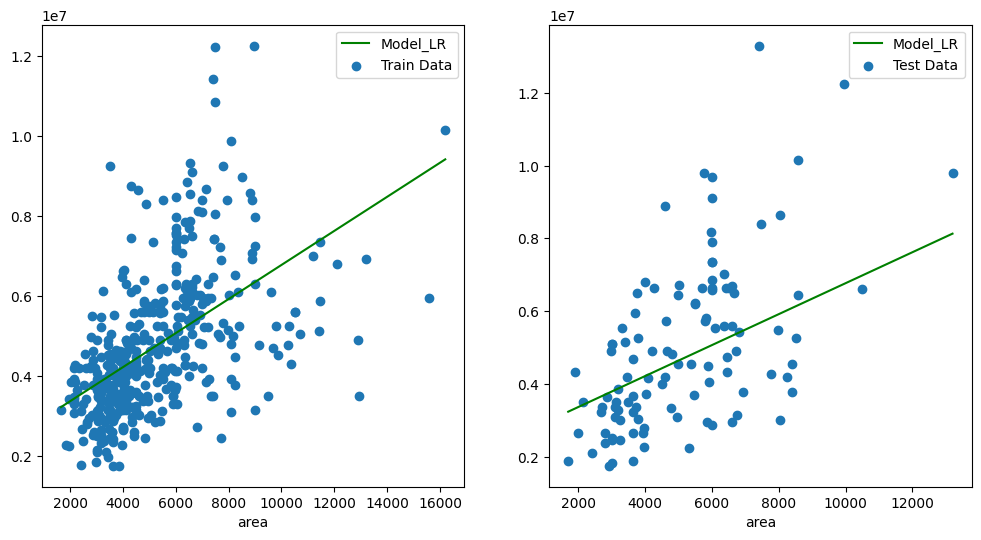

In [26]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.lineplot(x = X_train.area, y = y_train_pred.flatten(), ax=ax[0], label = 'Model_LR', color = 'g')
ax[0].scatter(X_train[['area']], X_train[['price']], label = 'Train Data')
ax[0].legend()

sns.lineplot(x = X_test.area, y = y_test_pred.flatten(), ax=ax[1], label = 'Model_LR', color = 'g')
ax[1].scatter(X_test[['area']], X_test[['price']], label = 'Test Data')
ax[1].legend()

plt.show()

### LOF try

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
X_train['anomaly'] = lof.fit_predict(X_train[['area']].values)
anomalies = X_train[X_train['anomaly'] == -1]# Вибір аномалій (-1 - аномалія, 1 - нормальні дані)
print(f'Кількість аномалій: {len(anomalies)}')

X_train_lof = X_train[X_train['anomaly'] == 1].drop(columns='anomaly')

Кількість аномалій: 44


In [28]:
grid_search_lof = GridSearchCV(pipeline_lr, param_grid_lr,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='r2',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_lof.fit(X_train_lof[['area']], X_train_lof[['price']])
print("Best Parameters:", grid_search_lof.best_params_)

Best Parameters: {'regressor__fit_intercept': True}


In [29]:
y_train_lof = X_train_lof[['price']]

y_train_pred_lof = grid_search_lof.predict(X_train_lof[['area']])
y_test_pred_lof = grid_search_lof.predict(X_test[['area']])

res['LR_lof'] = [r2_score(y_train_lof, y_train_pred_lof), r2_score(y_test, y_test_pred_lof)]
res

,LR,LR_lof
Train,0.284963,0.306896
Test,0.272879,0.306923


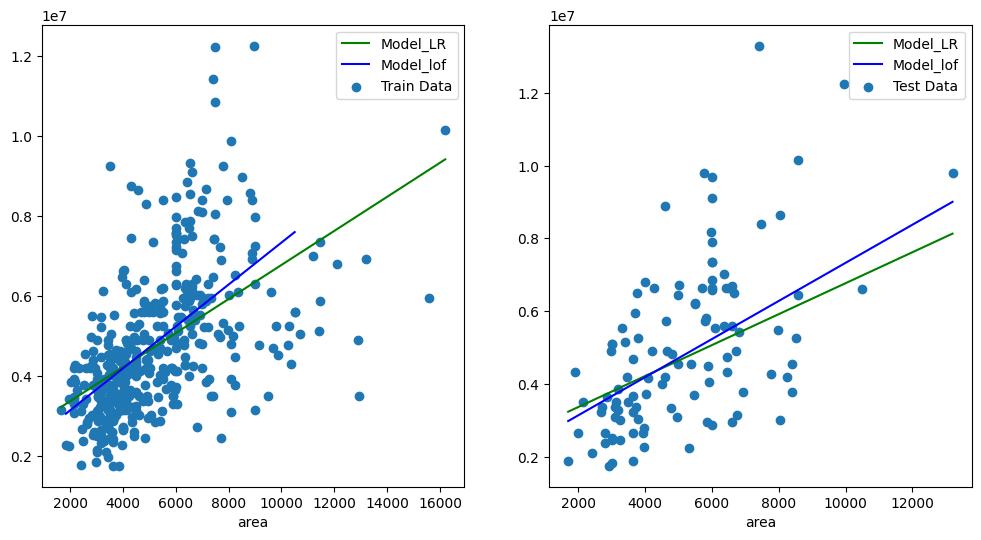

In [30]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.lineplot(x = X_train.area, y = y_train_pred.flatten(), ax=ax[0], label = 'Model_LR', color = 'g')
sns.lineplot(x = X_train_lof.area, y = y_train_pred_lof.flatten(), ax=ax[0], label = 'Model_lof', color = 'b')
ax[0].scatter(X_train[['area']], X_train[['price']], label = 'Train Data')
ax[0].legend()

sns.lineplot(x = X_test.area, y = y_test_pred.flatten(), ax=ax[1], label = 'Model_LR', color = 'g')
sns.lineplot(x = X_test.area, y = y_test_pred_lof.flatten(), ax=ax[1], label = 'Model_lof', color = 'b')
ax[1].scatter(X_test[['area']], X_test[['price']], label = 'Test Data')
ax[1].legend()

plt.show()

### ISOF try

In [31]:
from sklearn.ensemble import IsolationForest

# Визначення кількості сусідів
isof = IsolationForest(contamination=0.1, random_state=SEED)

# Знаходження аномалій
X_train['anomaly_isof'] = isof.fit_predict(X_train[['area']].values)

# Вибір аномалій (-1 - аномалія, 1 - нормальні дані)
anomalies = X_train[X_train['anomaly_isof'] == -1]
print(f'Кількість аномалій: {len(anomalies)}')

Кількість аномалій: 41


In [32]:
X_train_isof = X_train[X_train['anomaly_isof'] == 1].drop(columns='anomaly_isof')

In [33]:
grid_search_lr_isof = GridSearchCV(pipeline_lr, param_grid_lr,
                               cv=KFold(n_splits = 10, shuffle = True, random_state = SEED),
                               scoring='neg_mean_squared_error',
                               return_train_score = True,
                               n_jobs=-1)

grid_search_lr_isof.fit(X_train_isof[['area']], X_train_isof[['price']])
print("Best Parameters:", grid_search_lr_isof.best_params_)

Best Parameters: {'regressor__fit_intercept': True}


In [34]:
y_train_isof= X_train_isof[['price']]
y_train_pred_isof = grid_search_lr_isof.predict(X_train_isof[['area']])
y_test_pred_isof = grid_search_lr_isof.predict(X_test[['area']])

res['LR_isof'] = [r2_score(y_train_isof, y_train_pred_isof), r2_score(y_test, y_test_pred_isof)]
res

,LR,LR_lof,LR_isof
Train,0.284963,0.306896,0.331392
Test,0.272879,0.306923,0.320659


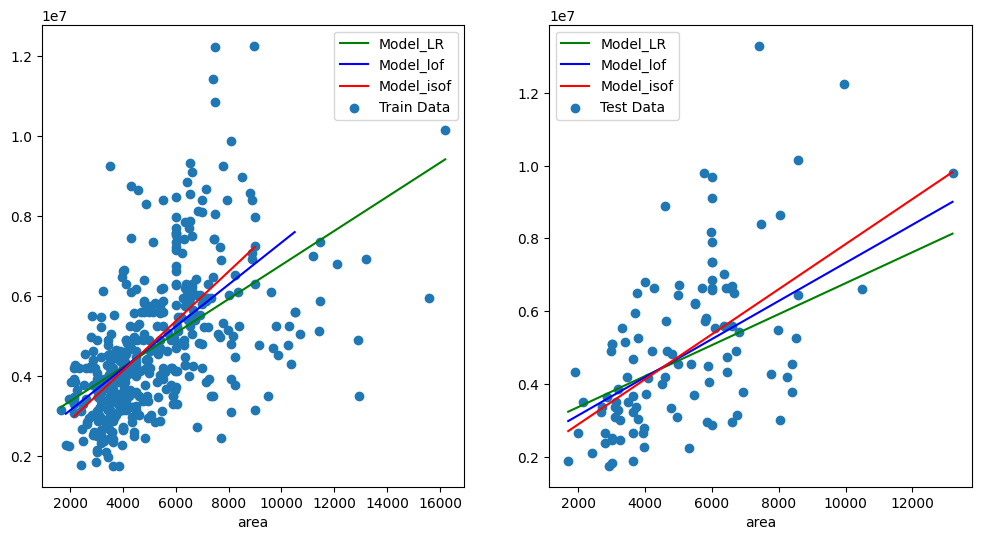

In [35]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

sns.lineplot(x = X_train.area, y = y_train_pred.flatten(), ax=ax[0], label = 'Model_LR', color = 'g')
sns.lineplot(x = X_train_lof.area, y = y_train_pred_lof.flatten(), ax=ax[0], label = 'Model_lof', color = 'b')
sns.lineplot(x = X_train_isof.area, y = y_train_pred_isof.flatten(), ax=ax[0], label = 'Model_isof', color = 'r')
ax[0].scatter(X_train[['area']], X_train[['price']], label = 'Train Data')
ax[0].legend()

sns.lineplot(x = X_test.area, y = y_test_pred.flatten(), ax=ax[1], label = 'Model_LR', color = 'g')
sns.lineplot(x = X_test.area, y = y_test_pred_lof.flatten(), ax=ax[1], label = 'Model_lof', color = 'b')
sns.lineplot(x = X_test.area, y = y_test_pred_isof.flatten(), ax=ax[1], label = 'Model_isof', color = 'r')
ax[1].scatter(X_test[['area']], X_test[['price']], label = 'Test Data')
ax[1].legend()

plt.show()

## Додаткова практика

https://www.kaggle.com/code/victorambonati/unsupervised-anomaly-detection

What is NAB?
https://www.kaggle.com/datasets/boltzmannbrain/nab